In [74]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd   
from google.cloud import storage

In [88]:
name = 'trainVector.csv'   
bucket_name = 'traindatab00872269'

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(name)
dest_file = '/tmp/'+ name
blob.download_to_filename(dest_file)
dataset=pd.read_csv(dest_file)

In [89]:
dataset.head()

,Current_Word,Next_Word,Levenshtein_distance
0,Mobiles,Mobile,1
1,Mobile,UK,6
2,UK,Britains,8
3,Britains,Vodafone,7
4,Vodafone,January,8


In [90]:
features = dataset[['Levenshtein_distance']]  

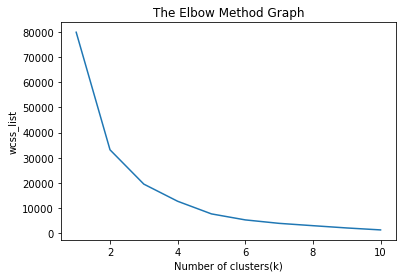

In [91]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(features)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [92]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(features)  

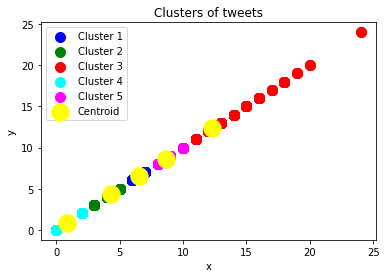

In [93]:
features=np.array(features)
plt.scatter(features[y_predict == 0], features[y_predict == 0], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(features[y_predict == 1], features[y_predict == 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(features[y_predict== 2], features[y_predict == 2], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(features[y_predict == 3], features[y_predict == 3], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(features[y_predict == 4], features[y_predict == 4], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:], kmeans.cluster_centers_[:], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of tweets')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()  

In [81]:
name = 'testVector.csv'   
bucket_name = 'testdatab00872269'

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(name)
dest_file = '/tmp/'+ name
blob.download_to_filename(dest_file)
dataset=pd.read_csv(dest_file)

In [82]:
dataset.head()

,Current_Word,Next_Word,Levenshtein_distance
0,Older,PCs,5
1,PCs,Preventon,8
2,Preventon,PC,8
3,PC,PCs,1
4,PCs,Paul,3


In [83]:
features = dataset[['Levenshtein_distance']]  

In [84]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(features) 

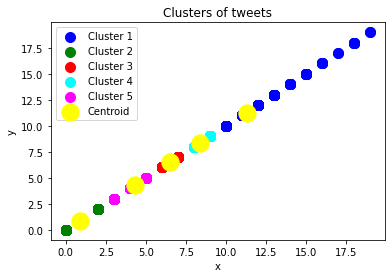

In [86]:
#visulaizing the clusters  
features=np.array(features)
plt.scatter(features[y_predict == 0], features[y_predict == 0], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(features[y_predict == 1], features[y_predict == 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(features[y_predict== 2], features[y_predict == 2], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(features[y_predict == 3], features[y_predict == 3], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(features[y_predict == 4], features[y_predict == 4], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:], kmeans.cluster_centers_[:], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of tweets')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()  